In [20]:
import pandas as pd

df_llm = pd.read_csv(r"C:\Users\meemankgupta\Videos\SLM-Finetuning\notebooks\LLM_BENCHMARKNIG.csv")

In [21]:
df_slm = pd.read_csv(r"C:\Users\meemankgupta\Videos\SLM-Finetuning\notebooks\SLM_Finetuning_BENCHMARKING.csv")

In [17]:
df_llm

,Unnamed: 0,question,context,response,ground_truth,relevance_score,groundedness_score,coherence_score,fluency_score,rouge_precision,rouge_recall,rouge_f1_score,gleu_score,bleu_score,meteor_score,similarity_score,f1_score
0,0,What is the main purpose of the microplate rea...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,The main purpose of the microplate reader is t...,The microplate reader is used to read the resu...,5.0,5.0,4.0,4.0,0.593750,0.826087,0.690909,0.376812,0.347353,0.746779,5.0,0.695652
1,1,What type of test is a microplate reader prima...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,A microplate reader is primarily used for read...,It is primarily used for the ELISA (Enzyme-Lin...,5.0,5.0,4.0,5.0,0.387097,0.600000,0.470588,0.171642,0.100462,0.506306,5.0,0.488889
2,2,Describe the wavelength range typically used b...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,The wavelength range typically used by a micro...,Microplate readers typically operate within a ...,5.0,5.0,5.0,5.0,0.461538,0.782609,0.580645,0.202247,0.159974,0.658303,4.0,0.596491
3,3,What are the key components required for an EL...,['Title: data.pdfTABLE OF FIGURES\nviiiTable o...,The key components required for an ELISA test ...,"Key components include a microplate reader, mi...",5.0,5.0,4.0,5.0,0.388889,0.823529,0.528302,0.117978,0.092603,0.602346,5.0,0.533333
4,4,What are the different phases involved in an E...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,The ELISA technique involves the following pha...,ELISA involves coating wells with antibodies/a...,5.0,5.0,5.0,5.0,0.087156,0.826087,0.157676,0.021061,0.008707,0.253121,5.0,0.162437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,What kind of maintenance is required for dispe...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,The routine maintenance for dispensers focuses...,Maintenance includes cleaning the dispensing t...,4.0,5.0,5.0,5.0,0.101010,0.476190,0.166667,0.023207,0.008732,0.264947,2.0,0.138614
81,81,How should the volume accuracy of a dispenser ...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,I don't know.,Volume accuracy should be checked by dispensin...,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.009091,0.000376,0.018797,1.0,0.000000
82,82,What factors could affect the accuracy of a la...,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,Several factors could affect the accuracy of a...,Factors include worn or damaged dispensing tip...,5.0,5.0,5.0,5.0,0.033835,0.529412,0.063604,0.008892,0.003291,0.143885,1.0,0.063492
83,83,How can a laboratory dispenser be calibrated?,['Title: data.pdfMAINTENANCE MANUAL FOR LABORA...,I don't know.,Calibration involves dispensing a specific vol...,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.011111,0.001021,0.022624,1.0,0.000000


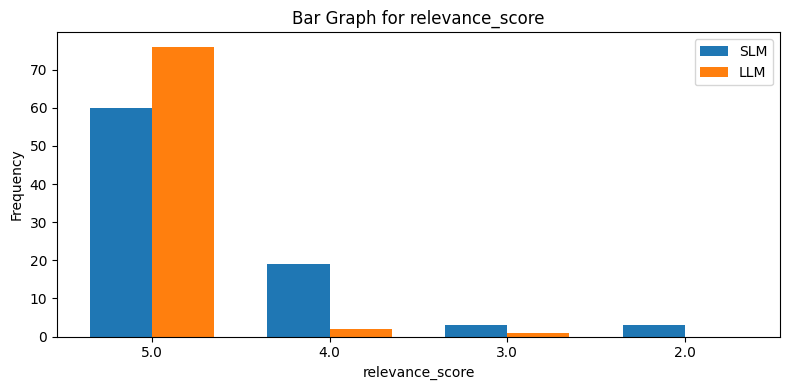

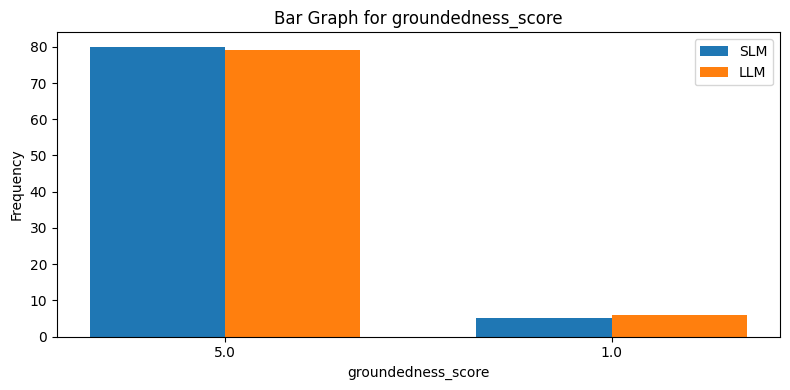

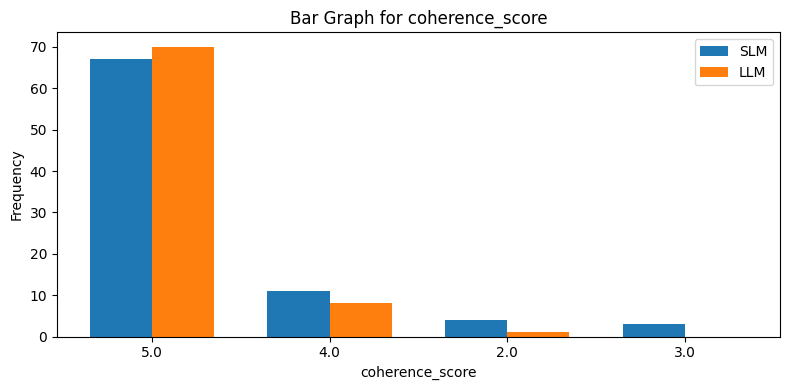

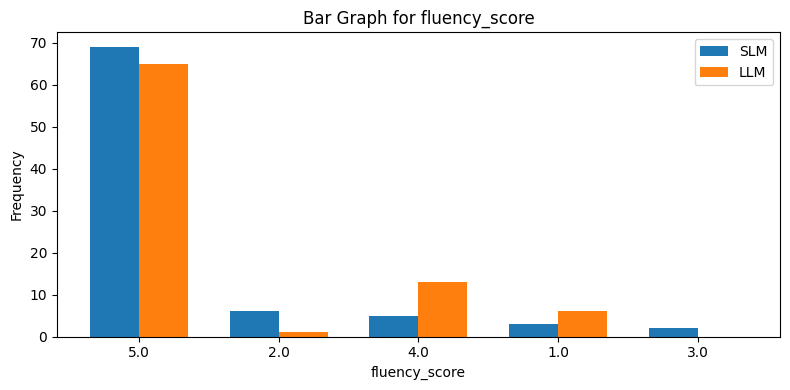

<Figure size 800x400 with 0 Axes>

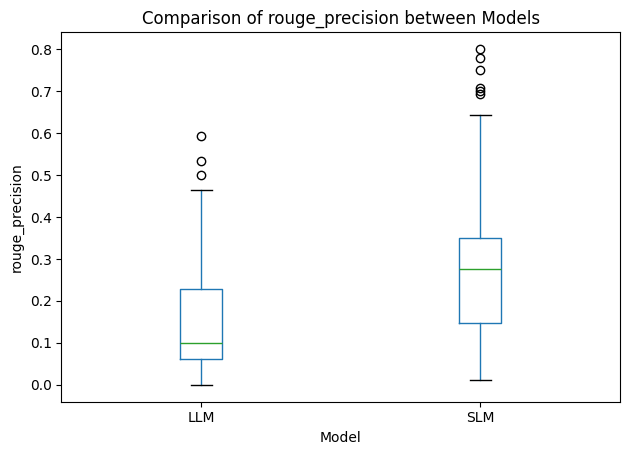

<Figure size 800x400 with 0 Axes>

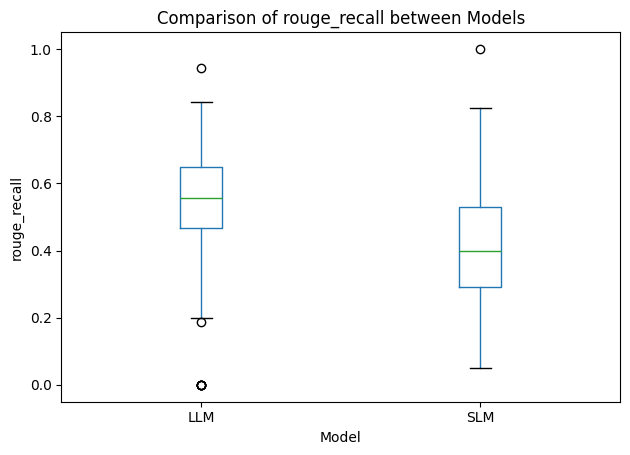

<Figure size 800x400 with 0 Axes>

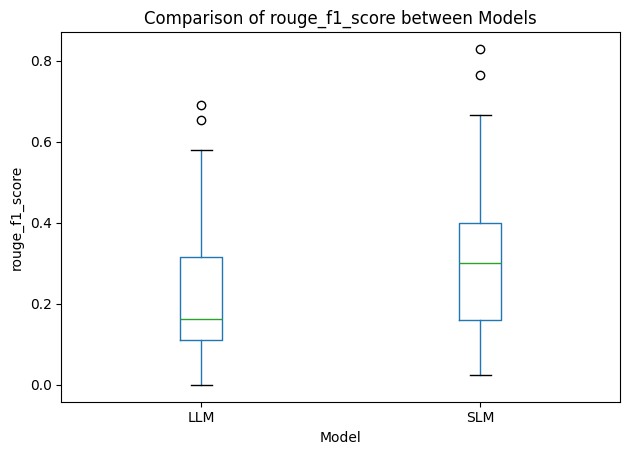

<Figure size 800x400 with 0 Axes>

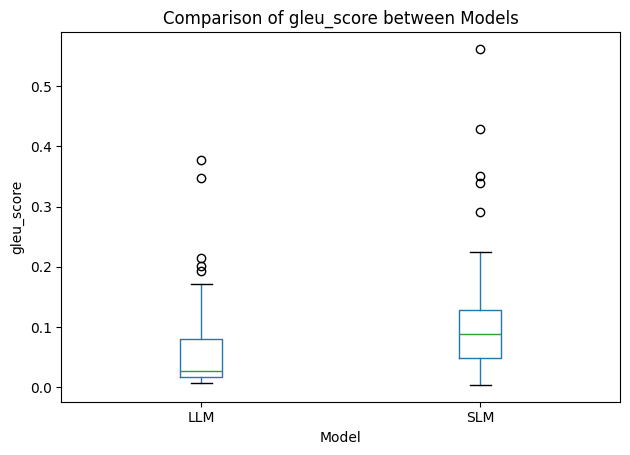

<Figure size 800x400 with 0 Axes>

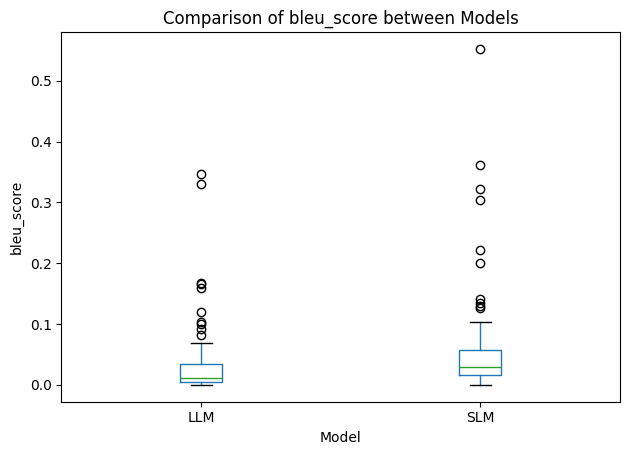

<Figure size 800x400 with 0 Axes>

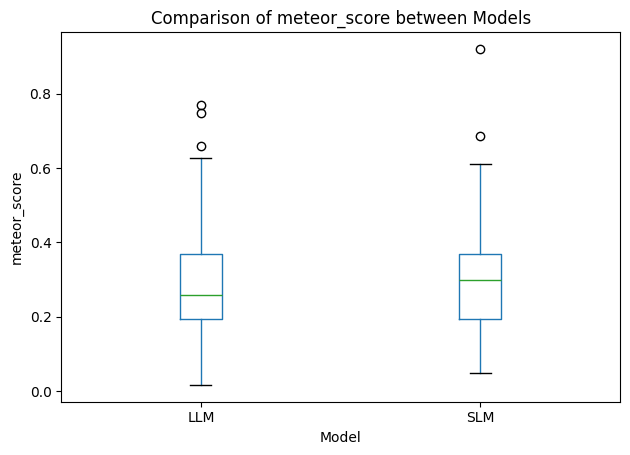

<Figure size 800x400 with 0 Axes>

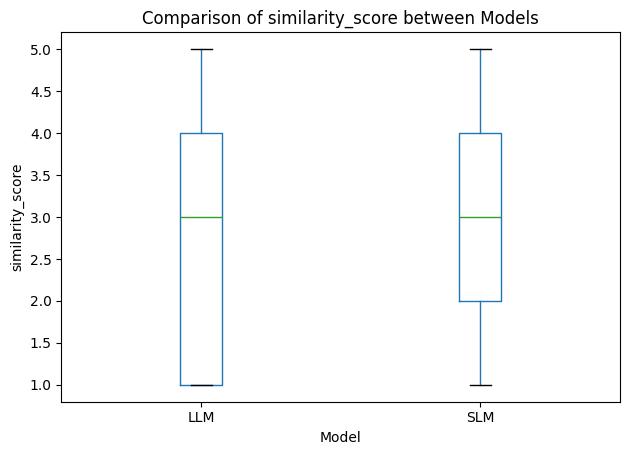

<Figure size 800x400 with 0 Axes>

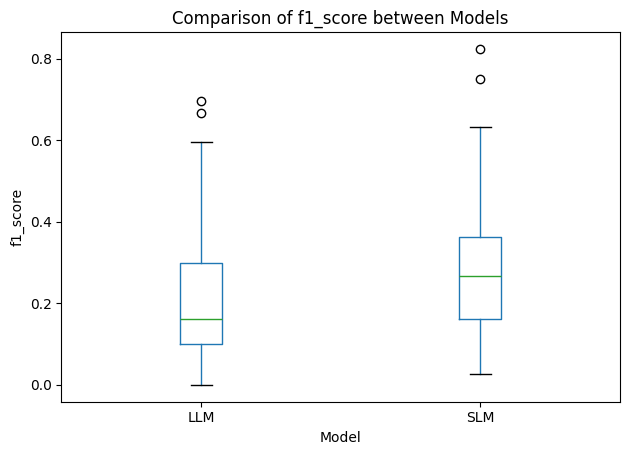

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Dictionary of model names and their corresponding DataFrames
models = {
    'SLM': df_slm,
    'LLM': df_llm,
    # Add more models here as needed
}

# List of categorical metrics to compare
categorical_columns = [
    'relevance_score',
    'groundedness_score',
    'coherence_score',
    'fluency_score'
]

# List of numerical metrics to compare
numerical_columns = [
    'rouge_precision',
    'rouge_recall',
    'rouge_f1_score',
    'gleu_score',
    'bleu_score',
    'meteor_score',
    'similarity_score',
    'f1_score'
]

# Create bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))  # Reduced plot size
    width = 0.35  # Width of the bars
    model_names = list(models.keys())
    
    # Get the counts for each model
    counts = {model_name: df[column].value_counts() for model_name, df in models.items()}
    
    # Define the positions for each bar on the x-axis
    x = np.arange(len(counts[model_names[0]]))  # Number of unique categories
    bar_positions = np.arange(len(counts[model_names[0]]))
    
    # Plot bars for each model
    for i, model_name in enumerate(model_names):
        plt.bar(bar_positions + (i * width), counts[model_name].reindex(counts[model_names[0]].index, fill_value=0), width=width, label=model_name)

    plt.title(f'Bar Graph for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(bar_positions + width / 2, counts[model_names[0]].index, rotation=0)  # Set category labels
    plt.legend()
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()

# Create box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))  # Reduced plot size
    
    # Combine the DataFrames for boxplot
    df_combined = pd.DataFrame({
        'score': pd.concat([df[ column ] for df in models.values()]),
        'model': np.concatenate([[model_name] * len(df) for model_name, df in models.items()])
    })

    # Create a box plot
    df_combined.boxplot(column='score', by='model', grid=False)
    plt.title(f"Comparison of {column} between Models")
    plt.suptitle("")  # Suppress the default title to keep it clean
    plt.xlabel("Model")
    plt.ylabel(column)
    plt.tight_layout()  # Adjust layout
    plt.show()


<Figure size 1000x600 with 0 Axes>

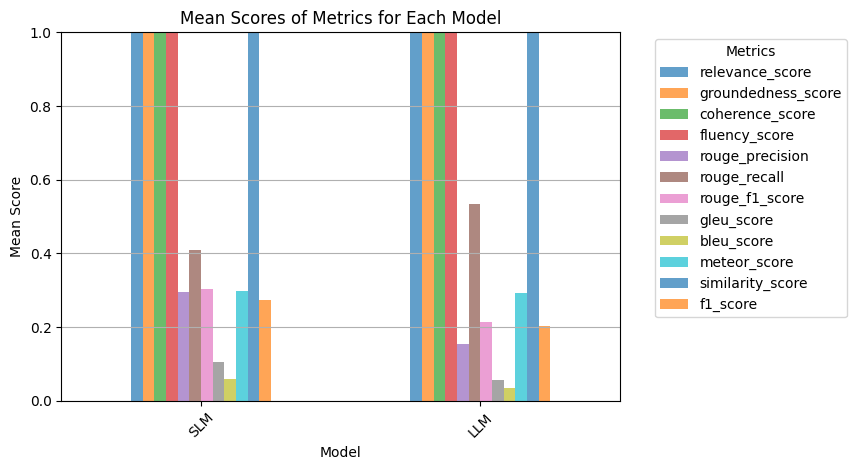

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary of model names and their corresponding DataFrames
models = {
    'SLM': df_slm,
    'LLM': df_llm,
    # Add more models here as needed
}

# List of metrics to compare
metrics = [
    'relevance_score',
    'groundedness_score',
    'coherence_score',
    'fluency_score',
    'rouge_precision',
    'rouge_recall',
    'rouge_f1_score',
    'gleu_score',
    'bleu_score',
    'meteor_score',
    'similarity_score',
    'f1_score'
]

# Calculate the mean scores for each model
mean_scores = {model_name: df[metrics].mean() for model_name, df in models.items()}

# Create a DataFrame for mean scores
mean_scores_df = pd.DataFrame(mean_scores).T  # Transpose for better plotting

# Plotting the mean scores
plt.figure(figsize=(10, 6))  # Adjust size as needed
mean_scores_df.plot(kind='bar', alpha=0.7)
plt.title('Mean Scores of Metrics for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust y-axis limits if necessary
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


In [32]:
mean_scores_df

,relevance_score,groundedness_score,coherence_score,fluency_score,rouge_precision,rouge_recall,rouge_f1_score,gleu_score,bleu_score,meteor_score,similarity_score,f1_score
SLM,4.600000,4.764706,4.658824,4.541176,0.295242,0.409345,0.302084,0.106130,0.057708,0.298249,2.964706,0.274497
LLM,4.670588,4.717647,4.588235,4.529412,0.152627,0.533712,0.214277,0.056211,0.033982,0.291488,2.894118,0.202622


# Summary of Model Performance
### Strengths of SLM:

Higher Groundedness score (4.76), indicating its responses are more fact-based.
Slightly better Relevance (4.60), meaning it is more on point with the questions.
Higher BLEU and GLEU scores suggest it generates phrases that are of better quality.

### Strengths of LLM:

Better Rouge Recall (0.53), meaning it identifies relevant information more effectively.
Comparable Fluency scores indicate both models articulate well.
A decent Similarity Score (2.89) shows it understands context.
### Weaknesses of SLM:

Lower Rouge Precision (0.30) and F1 Score (0.27) suggest it may include irrelevant information in its responses.
### Weaknesses of LLM:

Low Rouge Precision (0.15) indicates it might miss important details when generating responses.
### Conclusion
SLM excels in generating relevant and high-quality responses but struggles with precision. In contrast, LLM is better at recalling relevant information but lacks accuracy. Depending on the application, SLM may be preferable for general queries, while LLM could be useful for contexts where recalling detailed information is crucial. Overall, a combined approach leveraging the strengths of both models might yield the best results.






